In [27]:
import sys 
sys.path.append('/Users/willknott/Desktop/DIS/coursework/pds/wdk24/src')

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from generation import generate_from_total_pdf
from distributions import total_cdf
from hypothesis_test import signal_background_test

In [29]:
# True parameter values
true_params = {'f': 0.1, 'lam': 0.5, 'mu': 5.28, 'sigma': 0.018}

# Upper & Lower bound of M
alpha = 5
beta = 5.6

random_shifts = {
    'f': np.random.uniform(-0.09, 0.5), 
    'lam': np.random.uniform(-0.3, 1), 
    'mu': np.random.uniform(-0.25, 0.3), 
    'sigma': np.random.uniform(-0.01, 0.03)
}

# Creating starting parameters
starting_params = {}
for param in true_params:
    starting_params[param] = true_params[param] + random_shifts[param]
    starting_params[param] = float(f'{starting_params[param]:.4}')

In [30]:
n_datapoints = 40
n_init = 25
Ns = np.logspace(1, 6, num=n_datapoints).astype(int)
Ns = np.linspace(10000, 100000, n_datapoints).astype(int)
ns = np.array([n_init for _ in range(n_datapoints)])

all_data = [np.array([generate_from_total_pdf(N) for _ in range(n_init)]) for N in Ns]


In [31]:
def error_on_p(p, n):
    return np.sqrt((p*(1-p))/n)

### Hypothesis Testing

In [32]:
Ps = []
P_errs = []
for i, group_i in enumerate(all_data):

    r_discoveries = 0
    for dataset in group_i:
        discovery, _, _ = signal_background_test(dataset=dataset, cdf=total_cdf, starting_params=starting_params)
        if discovery:
            r_discoveries += 1
    p = r_discoveries/ns[i]
    Ps.append(p)
    P_errs.append(error_on_p(p, ns[i]))

In [33]:
print(Ns)
print(Ps)
print(P_errs)

[ 10000  12307  14615  16923  19230  21538  23846  26153  28461  30769
  33076  35384  37692  40000  42307  44615  46923  49230  51538  53846
  56153  58461  60769  63076  65384  67692  70000  72307  74615  76923
  79230  81538  83846  86153  88461  90769  93076  95384  97692 100000]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 0.24, 0.4, 0.8, 0.72, 0.96, 0.92, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.039191835884530846, 0.0854166260162505, 0.09797958971132711, 0.08, 0.0897997772825746, 0.039191835884530866, 0.05425863986500213, 0.039191835884530866, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [34]:
# successes = []
# for N_i in Ns:
#     n_discoveries = 0
#     for _ in range(n_init):
#         dataset = generate_from_total_pdf(N_i)

#         discovery, _, _ = signal_background_test(dataset=dataset, cdf=total_cdf, starting_params=starting_params)

#         if discovery:
#             n_discoveries += 1
#     successes.append(n_discoveries)

# dict(zip(Ns, successes))

# Finding `N_90`

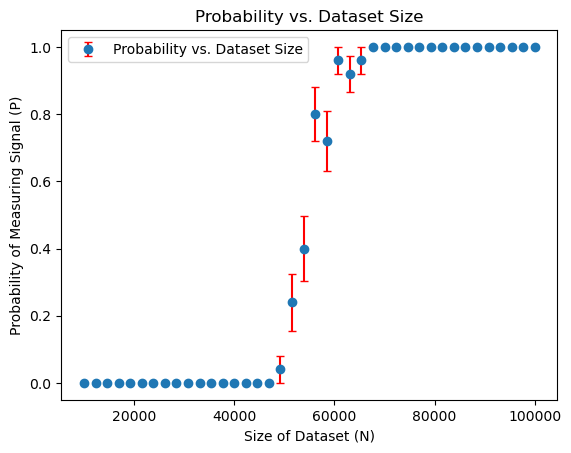

In [35]:
fig, ax = plt.subplots()
ax.errorbar(Ns, Ps, yerr=P_errs, fmt='o', ecolor='red', capsize=3, label='Probability vs. Dataset Size')
ax.set_xlabel('Size of Dataset (N)')
ax.set_ylabel('Probability of Measuring Signal (P)')
ax.set_title('Probability vs. Dataset Size')
ax.legend()